# Data Analysis

## Importing the libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report,accuracy_score
%matplotlib inline
plt.style.use('ggplot')

## Importing the dataset

In [13]:
df = pd.read_csv('creditcard.csv')

## Data Analysis

In [14]:
df.head() # Checkout data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
df.info() # Checkout datatypes and if any null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
df.describe() # Stats

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##### Intuition
- Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [17]:
df.columns # Column names

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Exploratory Data Analysis

## Analysis of Target Variable

### Histogram of target variable

<AxesSubplot:xlabel='Class', ylabel='count'>

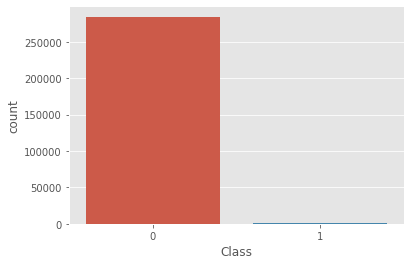

In [18]:
sns.countplot(data=df, x='Class')

### Number of Genuine and Fraud Transactions

In [19]:
fraud = df[df['Class']==1]
genuine = df[df['Class']==0]

In [20]:
perc_genuine = (len(genuine)/(len(genuine)+len(fraud)))*100
print('Number of Genuine Transactions = {} and the percentage of genuine transactions = {:.3f} %'.format(len(genuine),perc_genuine))

Number of Genuine Transactions = 284315 and the percentage of genuine transactions = 99.827 %


In [21]:
perc_fraud = (len(fraud)/(len(genuine)+len(fraud)))*100
print('Number of fraud Transactions = {} and the percentage of fraud transactions = {:.3f} %'.format(len(fraud),perc_fraud))

Number of fraud Transactions = 492 and the percentage of fraud transactions = 0.173 %


##### Intuition
- Highly unbalanced data.

In [22]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [23]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

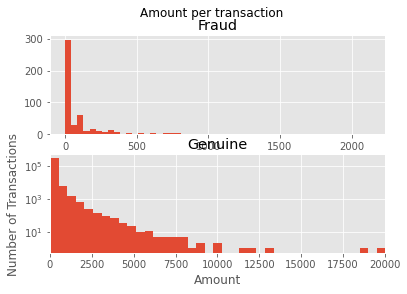

In [24]:
plot,(axis1, axis2) = plt.subplots(2, 1)
axis1.hist(fraud.Amount, bins = 50)
axis1.set_title('Fraud')
axis2.hist(genuine.Amount, bins = 50)
axis2.set_title('Genuine')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plot.suptitle('Amount per transaction')
plt.yscale('log')
plt.show()

##### Intuition
- Fraud transactions is usually small amount.

## Analyzing particular features
The only features that are not PCA transformed are Time and Amount. 
Analyzing Time (if fraud transactions occur more often during a certain time period) and Amount (if there is any correlation of amount with fraud transactions).

### Amount

C:\Users\user\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Monetary Value Feature'}, xlabel='Amount', ylabel='Density'>

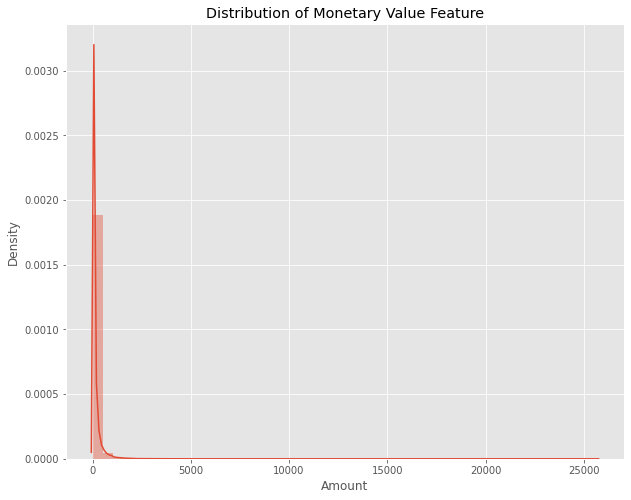

In [25]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

### Time

C:\Users\user\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Time Feature'}, xlabel='Time', ylabel='Density'>

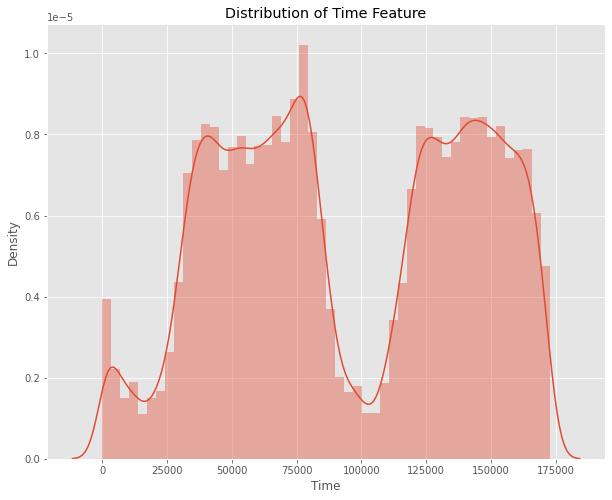

In [26]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

#### Visualizing Time with respect to class

Text(0.5, 0.98, 'Time vs Amount of transaction')

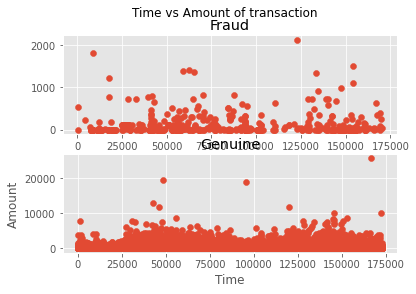

In [27]:
plot, (axis1, axis2) = plt.subplots(2, 1)
axis1.scatter(fraud.Time, fraud.Amount)
axis1.set_title('Fraud')
axis2.scatter(genuine.Time, genuine.Amount)
axis2.set_title('Genuine')
plt.xlabel('Time')
plt.ylabel('Amount')
plot.suptitle('Time vs Amount of transaction')
#plt.show();

##### Intuition
- Time of transaction doesn't seem to matter.

### Correlation
Visualization of correlation of all features of dataset

In [28]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


Text(0.5, 1.0, 'Heatmap of Correlation')

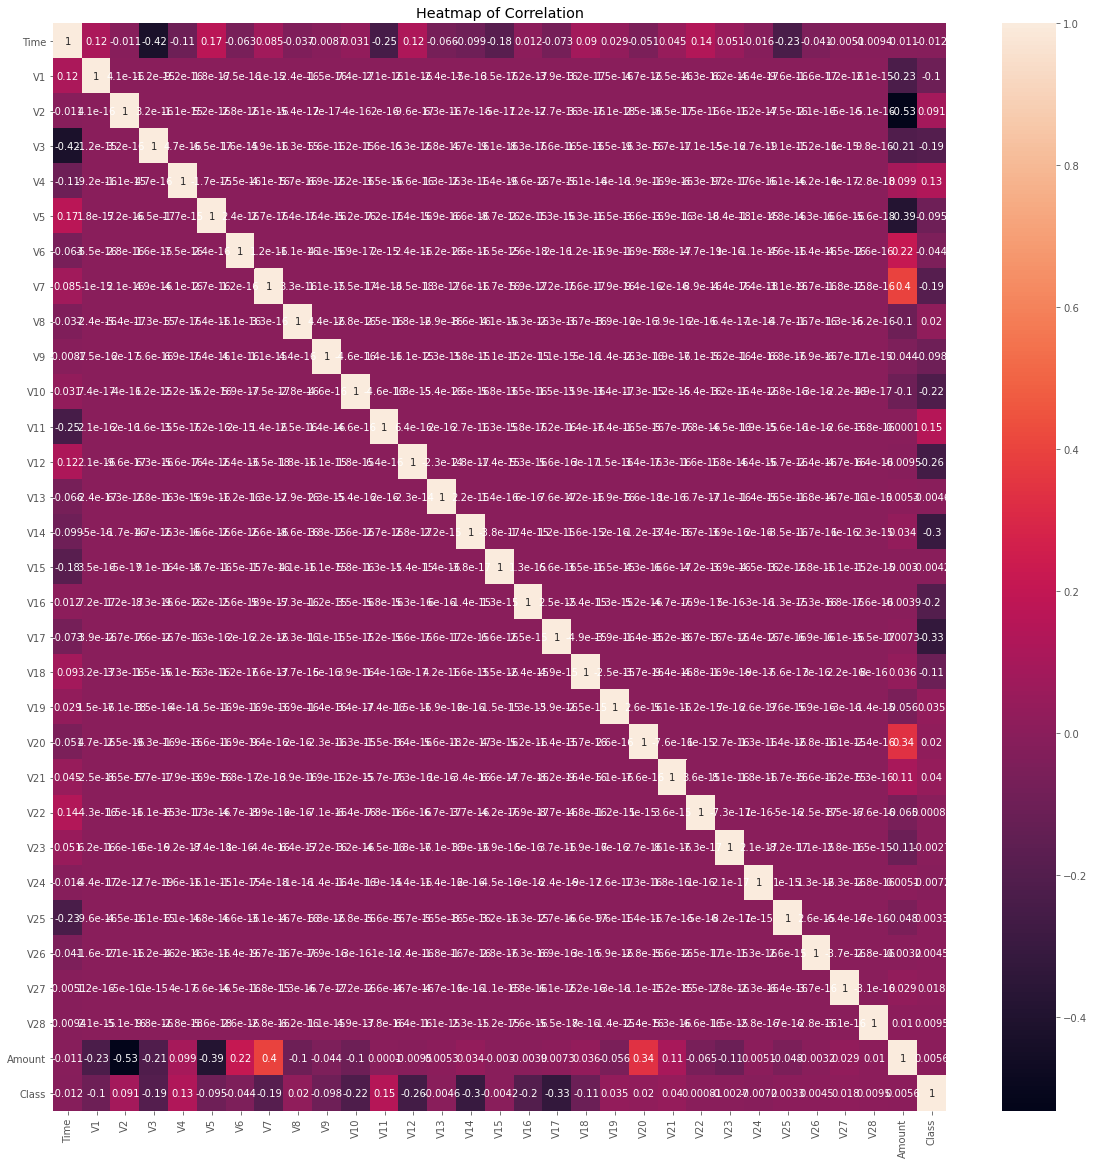

In [29]:
#heatmap
corr = df.corr()
plt.figure(figsize=(20,20))
heat = sns.heatmap(data=corr,annot=True)
plt.title('Heatmap of Correlation')

## Data Preprocessing

### Missing Data

In [30]:
df.isnull().values.any()

False

##### Intuition
- No null values in data.

### Feature Scaling

In [31]:
scaler = StandardScaler()
scaler2 = StandardScaler()

In [32]:
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [33]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [34]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
271197,164456.0,1.958733,-0.657382,-0.381455,0.309437,-0.758689,-0.014707,-0.902006,0.243256,1.314378,...,0.130555,-0.458657,-0.337373,0.584925,-0.032777,-0.065134,11.50,0,-0.307251,1.466519
275003,166319.0,-1.254306,1.902410,-1.151950,-1.626653,1.346718,-1.108720,2.074088,-0.775979,0.756735,...,-0.322776,-0.423228,-0.118755,-0.001596,0.022236,-0.398216,16.00,0,-0.289260,1.505750
84829,60479.0,1.473067,-0.547148,0.202956,-0.848835,-0.837381,-0.590798,-0.674406,-0.054658,-0.485992,...,0.052410,-0.508665,0.297172,-0.422760,0.000961,0.010296,4.13,0,-0.336717,-0.723021
257530,158211.0,-0.226314,-0.297952,0.794719,-1.257447,-0.298839,-0.887124,0.298240,-0.140477,-0.908093,...,0.232487,0.028383,-0.984614,0.428115,0.153535,0.221694,62.70,0,-0.102549,1.335012
237049,149073.0,-2.242576,-3.234665,-3.441106,1.080474,-3.220888,1.061752,7.433814,-1.201477,-1.501452,...,3.478223,-0.086769,0.208090,0.022156,-0.310671,0.370119,1618.42,0,6.117353,1.142585


In [35]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

### Splitting the dataset into the Training set and Test set manually using numpy's random.rand

In [36]:
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256363, 31)
Test Shape: (28444, 31)


In [37]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

### Creating a subsample data set with balanced class distributions

In [38]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 435 fraudulent transactions in the train data.


In [39]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [40]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
76122,-4.200744,-4.572094,-1.044589,0.360988,1.914340,-2.619056,-0.109648,0.484437,-0.466980,-0.569057,...,-0.102921,0.951632,0.035243,-0.782943,0.693705,0.146925,-0.445929,0,1.282388,-0.725590
235862,-0.676751,-0.315426,0.147010,-1.648969,2.596872,3.989366,-0.183517,0.986447,0.496947,-0.392663,...,0.888715,-0.023784,0.757364,-0.290651,0.590967,0.200048,0.007774,0,-0.073403,1.378686
126202,1.297027,0.122938,-0.212699,0.046763,0.626905,0.796102,-0.141145,0.178137,-0.133940,0.055185,...,-0.817052,-0.062277,-1.709709,0.352885,0.213276,-0.017092,-0.011696,0,-0.348072,-0.236583
39109,-0.398814,0.925271,0.992922,-0.519449,0.847187,0.675580,0.496624,0.301613,-0.578700,-0.186444,...,-0.610598,-0.178754,-1.358486,-0.113321,0.167549,0.277483,0.093637,0,-0.349271,-1.122700
24618,-3.219586,-0.439685,-0.242817,-0.065503,-3.034174,0.216369,0.745870,0.964118,0.594038,-1.338438,...,-0.077380,0.656995,0.492037,-0.735244,0.659003,0.096201,-0.372524,0,1.148332,-1.270253


In [41]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [42]:
subsample = pd.concat([selected, fraud])
len(subsample)

870

In [43]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-8.461845,6.866198,-11.838269,4.194211,-6.923097,-3.221147,-7.553497,6.015618,-2.466143,-6.246243,...,-0.715366,0.210747,-0.060211,0.509535,-0.257284,1.170027,0.229301,1,0.046539,-0.928820
1,1.887478,-1.223282,-1.542707,-0.936379,-0.539661,-0.808797,-0.194685,-0.335478,-0.865475,0.947121,...,1.343939,-0.221932,-0.269128,0.171661,0.057235,-0.065717,-0.047935,0,0.356831,0.506214
2,1.695882,-0.426820,-1.912305,0.389454,0.225847,-0.473638,0.152782,-0.061627,0.729139,-0.809169,...,-0.455462,0.089736,0.582883,-0.147448,-0.154234,-0.037926,0.003833,0,0.266474,0.402736
3,0.290155,0.049243,-0.740524,2.865463,1.395294,-0.535163,0.142543,-0.222770,-1.463691,1.713538,...,1.018191,0.303550,0.833886,-1.222306,2.745261,-0.220402,0.168233,1,-0.324523,0.723806
4,-6.664482,7.439606,-7.004457,0.998830,-3.038129,-2.916890,-2.564026,3.838689,2.079941,2.985874,...,-0.733099,0.894468,0.240885,0.708426,-0.306072,1.206710,0.667557,0,-0.349671,-0.278572
5,2.084782,-0.830721,-1.026154,-0.606764,-1.060830,-0.896918,-1.095894,0.063542,0.062703,0.302870,...,0.772763,0.123120,-0.068330,-0.252252,-0.107472,0.013703,-0.024026,0,-0.273468,0.700474
6,-1.101035,-1.674928,-0.573388,5.617556,0.765556,0.440607,1.934740,-1.019788,-0.193244,1.783739,...,-0.208823,0.344833,1.091435,-0.686513,0.075809,0.033865,-0.832855,1,2.185955,0.332781
7,-0.460822,0.370472,1.762221,-0.613561,-0.743981,0.713763,-1.430104,-2.487753,1.507597,-1.848279,...,-0.265679,-0.139856,0.035508,0.812363,0.832500,-0.058529,0.185510,0,-0.124539,-1.831257
8,0.702710,2.426433,-5.234513,4.416661,-2.170806,-2.667554,-3.878088,0.911337,-0.166199,-5.009249,...,-0.009802,0.721698,0.473246,-1.959304,0.319476,0.600485,0.129305,1,-0.349231,-1.835027
9,-7.139060,2.773082,-6.757845,4.446456,-5.464428,-1.713401,-6.485365,3.409395,-3.053493,-6.260706,...,-0.016118,-0.876670,0.382230,-1.054624,-0.614606,-0.766848,0.409424,1,0.074166,-0.361920


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

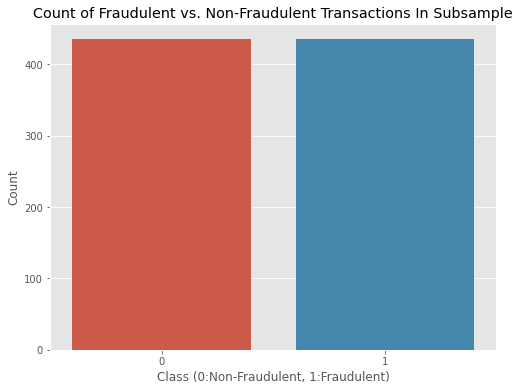

In [44]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

### Correlation

In [45]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.440513
V2,0.500517
V3,-0.553191
V4,0.716944
V5,-0.366723
V6,-0.413321
V7,-0.463857
V8,0.054857
V9,-0.539839
V10,-0.621121


In [46]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.553191
V9,-0.539839
V10,-0.621121
V12,-0.677899
V14,-0.741409
V16,-0.593425
V17,-0.556015


In [47]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V2,0.500517
V4,0.716944
V11,0.673278
Class,1.000000


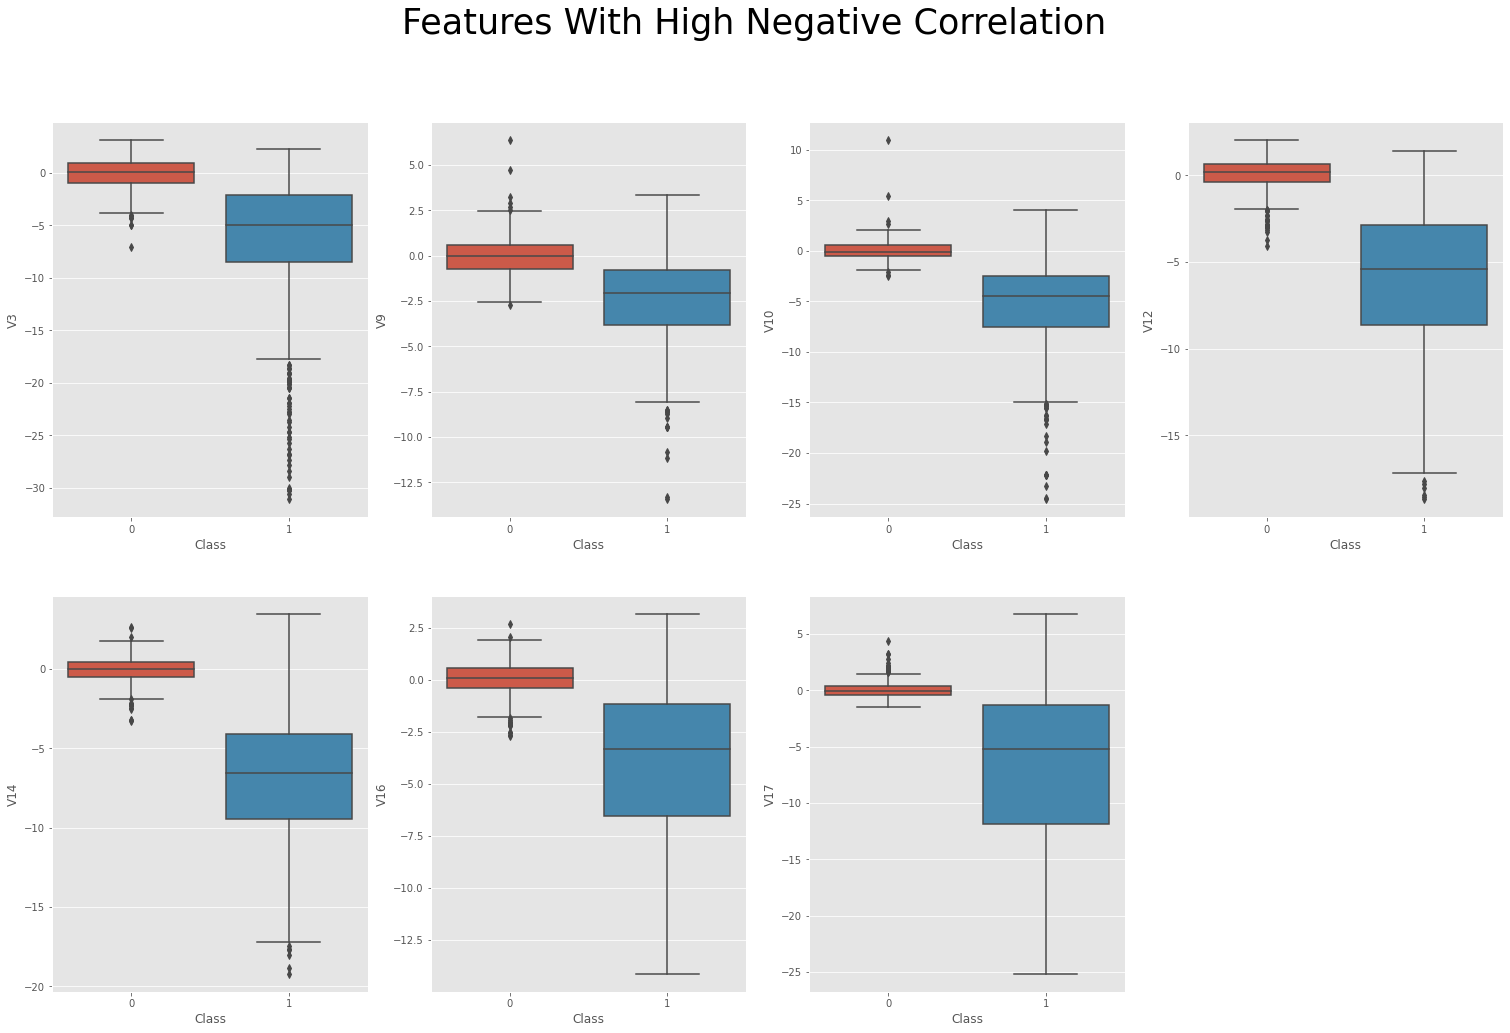

In [48]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

<AxesSubplot:xlabel='Class', ylabel='V11'>

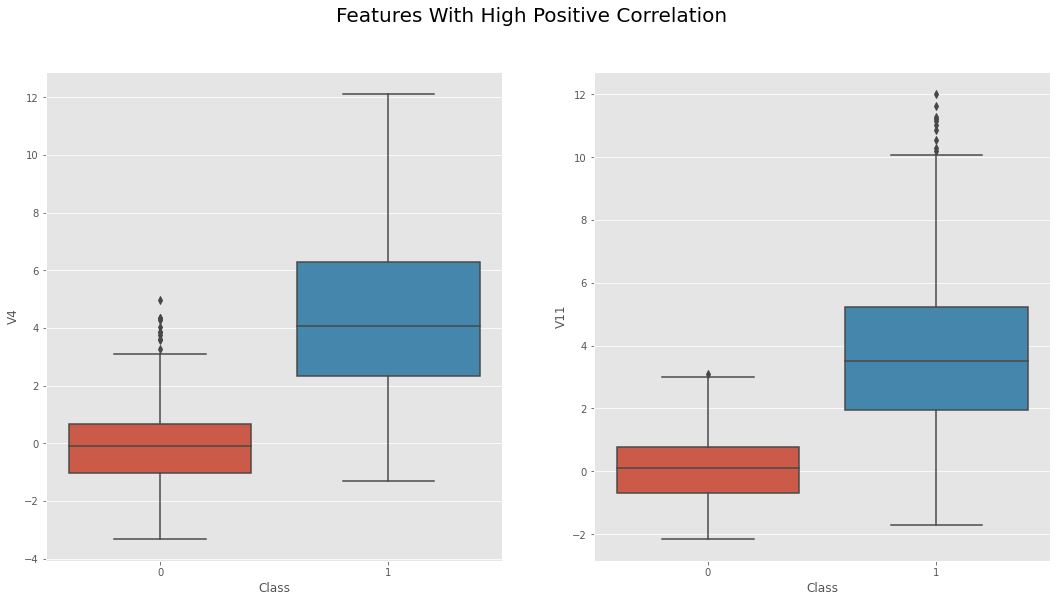

In [49]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

### Extreme Outlier Removal

In [50]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [51]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 870 transactions by 254 transactions to 616 transactions.


### Input features and Target variable division

In [52]:
X = df2.drop('Class', axis=1)
y = df2['Class']

### Dimensionality Reduction

In [53]:
from sklearn.manifold import TSNE

In [54]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

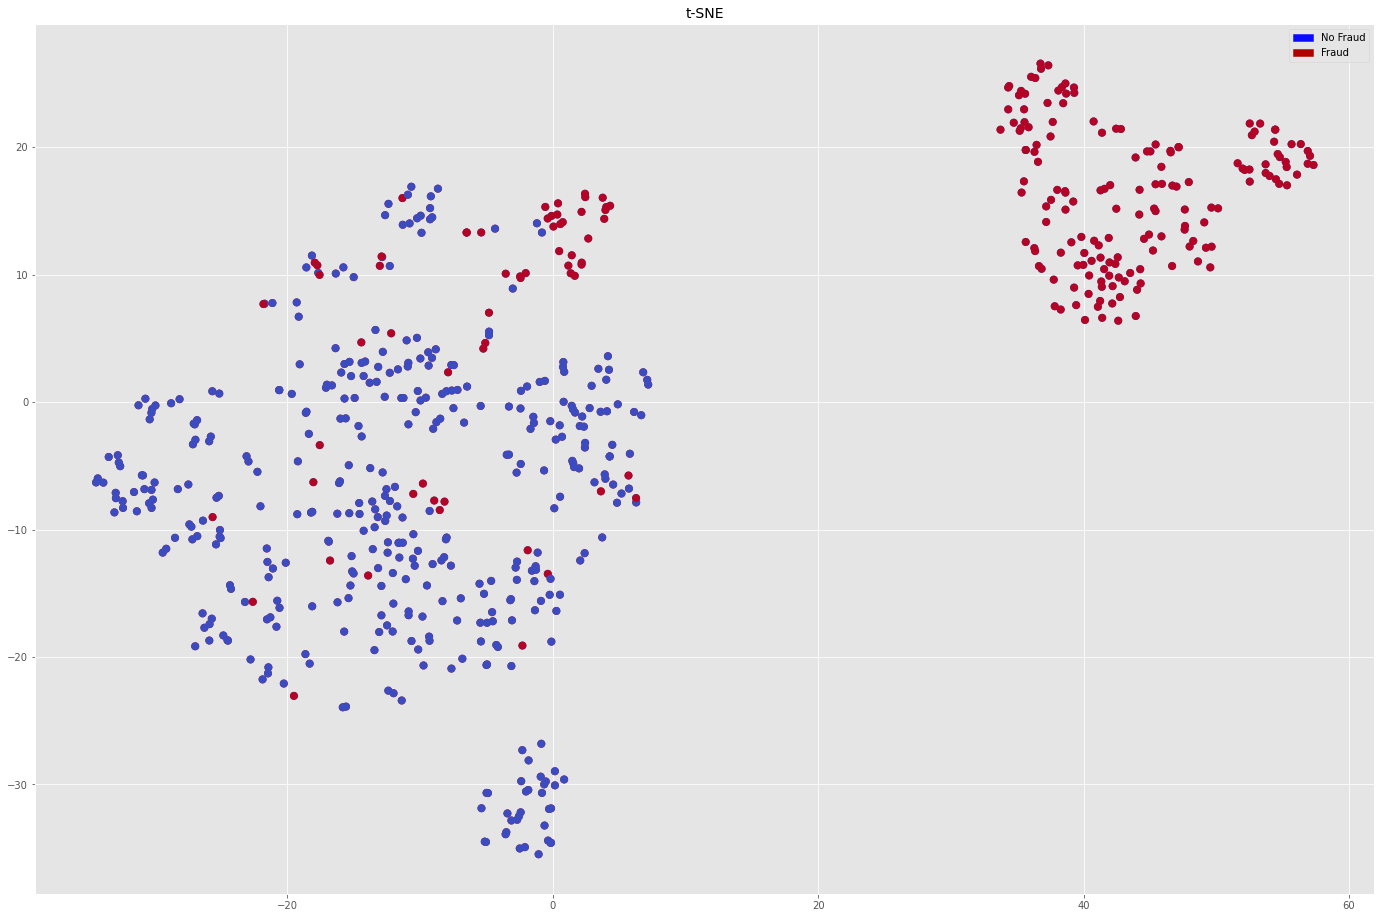

In [55]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


### Splitting the dataset into the Training set and Test set

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [58]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (492, 30) (124, 30) 

Y_shapes:
 Y_train: Y_validation:
 (492,) (124,)


## Classification Algorithms

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [61]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.968535 (0.028781)
KNN: 0.963924 (0.021788)
SVM: 0.968401 (0.021119)
NB: 0.958010 (0.032210)
CART: 0.897297 (0.032172)
RF: 0.968990 (0.019503)


## Model Evaluation

C:\Users\user\miniconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


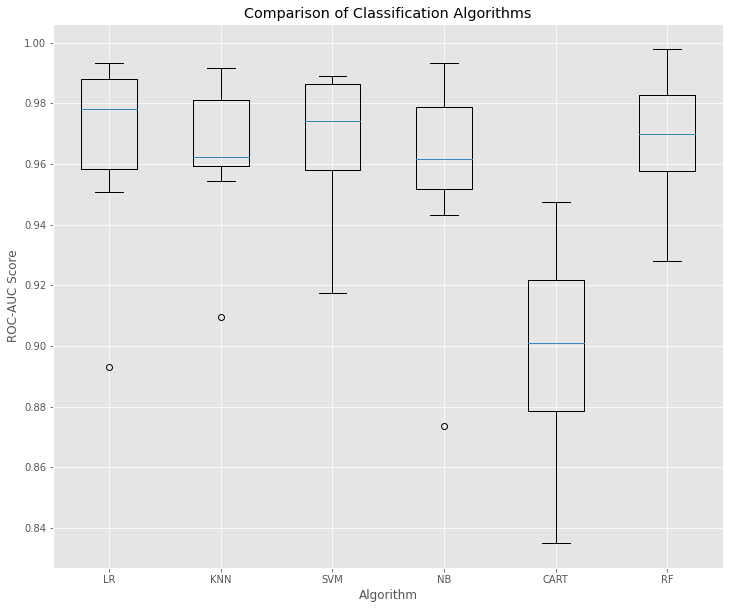

In [62]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [63]:
##Precision- Recall

models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
    
for name, model in models:
    print(name)
    model.fit(X_train,y_train)
    pred = model.predict(X_validation)
    print(confusion_matrix(y_validation,pred))
    print('Precision Score: {}'.format(precision_score(y_validation,pred)))
    print('Recall Score: {}'.format(recall_score(y_validation,pred)))
    

LR
[[82  2]
 [ 7 33]]
Precision Score: 0.9428571428571428
Recall Score: 0.825
KNN
[[83  1]
 [ 8 32]]
Precision Score: 0.9696969696969697
Recall Score: 0.8
SVM
[[84  0]
 [ 7 33]]
Precision Score: 1.0
Recall Score: 0.825
NB
[[81  3]
 [ 9 31]]
Precision Score: 0.9117647058823529
Recall Score: 0.775
CART
[[79  5]
 [ 6 34]]
Precision Score: 0.8717948717948718
Recall Score: 0.85
RF
[[84  0]
 [ 7 33]]
Precision Score: 1.0
Recall Score: 0.825


LR
[[82  2]
 [ 7 33]]
Precision Score: 0.9428571428571428
Recall Score: 0.825


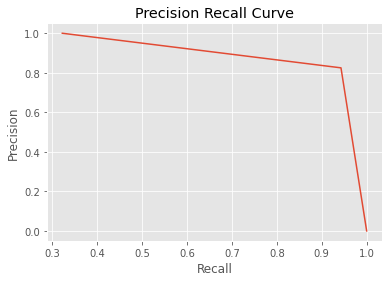

KNN
[[83  1]
 [ 8 32]]
Precision Score: 0.9696969696969697
Recall Score: 0.8


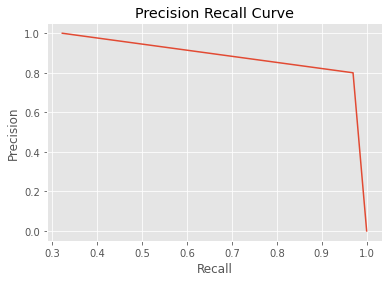

SVM
[[84  0]
 [ 7 33]]
Precision Score: 1.0
Recall Score: 0.825


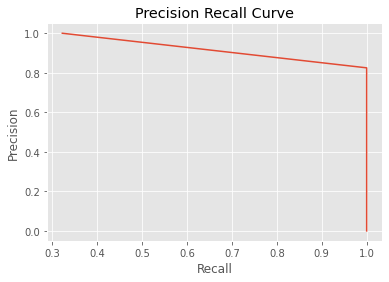

NB
[[81  3]
 [ 9 31]]
Precision Score: 0.9117647058823529
Recall Score: 0.775


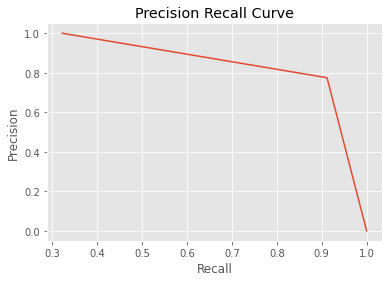

CART
[[79  5]
 [ 6 34]]
Precision Score: 0.8717948717948718
Recall Score: 0.85


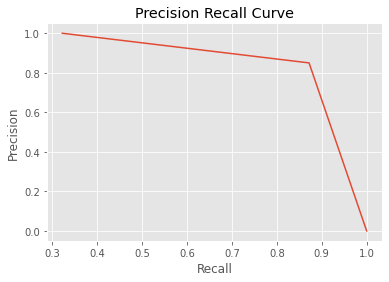

RF
[[84  0]
 [ 7 33]]
Precision Score: 1.0
Recall Score: 0.825


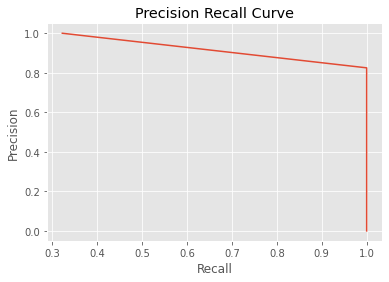

In [64]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve,roc_curve

for name, model in models:
    print(name)
    model.fit(X_train,y_train)
    pred = model.predict(X_validation)
    print(confusion_matrix(y_validation,pred))
    print('Precision Score: {}'.format(precision_score(y_validation,pred)))
    print('Recall Score: {}'.format(recall_score(y_validation,pred)))
    
    precision, recall, thresholds = precision_recall_curve(y_validation, pred)

    # Plot ROC curve
    plt.plot(precision, recall)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show()